Introduction to Data Science <br> Winter 2018

# Homework 7
Due Saturday, 2/24/2018 , 3:00am

Please complete this notebook by filling in the cells provided. Once you are finished, "Save and Checkpoint" the notebook, download the ipynb and html versions to your computer, and submit the html version. 

**Total points: 135**

In this homework you will practice the use of permutation tests to assess associations. 

A summary of the methods to Table is [here](http://data8.org/datascience/tables.html) <br>
A tutorial for the datascience module is [here](http://data8.org/datascience/tutorial.html) <br>
A cheatsheet for the datascience module is [here](https://github.com/wstuetzle/STAT180/blob/master/Computing/data8_sp17_midterm_ref_sheet.pdf)

In [1]:
from datascience import *
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

We will work with the Birth Weight data that originally came from the Child Health and Development Studies conducted at the Oakland, CA, Kaiser Foundation Hospital. The features should be self explanatory. We will use permutation tests to assess associations between features.

In [2]:
baby = Table.read_table("baby.csv")
baby.show(5)
baby.num_rows

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


1174

**Question 1 (5 points) :** Change the labels to "BW", "GD", etc to reduce the amount of typing.

In [3]:
new_labels = ["BW", "GD", "MA", "MH", "MPW", "MS"]
baby = baby.relabeled(baby.labels, new_labels)
baby.labels

('BW', 'GD', 'MA', 'MH', 'MPW', 'MS')

In [4]:
...
baby.labels

('BW', 'GD', 'MA', 'MH', 'MPW', 'MS')

### Maternal smoking and Birth Weight

**Question 2 (5 points):** Calculate and output the number of smoker moms and the number of nonsmoker moms

In [5]:
smoker_mom = baby.where("MS", are.equal_to(True))
nonsmoker_mom = baby.where("MS", are.equal_to(False))
print("Number of smoker moms = " + str(smoker_mom.num_rows))
print("Number of nonsmoker moms = " + str(nonsmoker_mom.num_rows))

Number of smoker moms = 459
Number of nonsmoker moms = 715


In [6]:
...

Ellipsis

**Question 3 (5 points):** Draw histograms of birth weights for babies of smokers and babies of non-smokers. Make sure the horizontal axes are the same. 

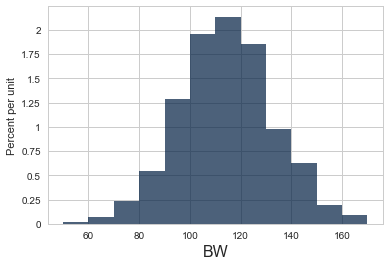

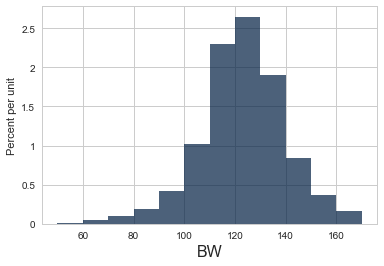

In [7]:
smoker_mom.hist("BW", bins = np.arange(50, 180, 10))
nonsmoker_mom.hist("BW", bins = np.arange(50, 180, 10))

In [8]:
...

Ellipsis

**Question 4 (5 points):** Calculate the difference between mean birth weights for babies of non-smokers and smokers. Do the same for median birth weights.

In [9]:
diff_between_means = np.mean(nonsmoker_mom.column("BW")) - np.mean(smoker_mom.column("BW"))
diff_between_medians = np.median(nonsmoker_mom.column("BW")) - np.median(smoker_mom.column("BW"))
print("diff between means = " + str(diff_between_means))
print("diff between medians = " + str(diff_between_medians))

diff between means = 9.26614257202
diff between medians = 8.0


In [10]:
...

Ellipsis

### Is there an association between maternal smoking and birth weight or is the difference in means just a statistical fluke?

The data suggest that there is an association: among our group of 1174, babies of 459 smokers seem to have on average lower birth weights that babies of 715 non-smokers. On the other hand, one would not expect that the average birth weights of the smoker babies and the non-smoker babies to be ** exactly** the same, even if there was no systematic difference. So the question is whether a between-group difference in mean birth weight of about 9 ounces can be explained by sampling fluctuations or whether it is evidence for an association between smoking and birth weight.

** Note: ** These data were the result of an observational study, not a randomized experiment, so we cannot hope to answer the question whether maternal smoking ** causes** lower birth weight.

<br>

** For sake of argument, let's suppose there is no association.**


* "No association" means that the conditional distribution of birth weights is the same for babies of smokers and babies of non-smokers. 


* Therefore we can think of all the birth weights as random draws from the same population. We "drew" 120 ounces for baby 1, 113 ouunces for baby 2, 128 ounces for baby 3, etc.


* This particular sequence of draws is as likely as any other sequence that has the same weights, just in a different order. 


* Therefore all the possible pairings between the 1174 birth weights and the 1174 labels (459 "smoker" and 715  "nonsmoker") are equally likely to occur.


* We compute the between-groups difference in mean birth weight for all possible pairings. The distribution of these differences is called the "permutation distribution".


* We then check where the actually observed difference d_original falls in the permutation distribution. If it is unusually large or unusally small then this can be either due to the luck of the draw or because the "null hypotheses" of no association is false.


* More specifically, suppose that for a fraction alpha of permutations the absolute value of the between groups difference of means is larger than the absolute value of the actually observed difference. If we reject the null hypotheses of "no association", the chance of doing so erroneously is alpha. We can reject the null hypotheses at significance level alpha. 


* In practice we typically cannot compute the between groups difference for all permutations. Instead we do so for a random sample of permutations. Suppose we draw N permutations and the absolute values of the group differences are |d_1|,...., |d_N|. 


* If k among those N differences are as large or larger than |d_original| then we can reject the null hypothesis at level (k+1) / (N+1). For example, if |d_original| is larger than |d_1|,..., |d_N|, then k = 0 and we can reject the null hypothesis at significance level 1/(N+1).


**Question 5 (20 points):** Draw the histograms of between groups differences in mean birth weight for a sample of N = 1000 random pairings between birth weights and labels. (This is an approximation (estimate) for the permutation distribution).
Calculate the significance level.

Do the same for the between groups difference in median birth weight.

(To be clear: you should produce two histograms and calculate two significance levels.

In [11]:
# pl means "permuted labels"

num_perm =1000
pl_diff_between_means = np.zeros(num_perm)
pl_diff_between_medians = np.zeros(num_perm)

for i in np.arange(num_perm):
    permuted_labels = baby.select("MS").sample(baby.num_rows, with_replacement = False).column("MS")
    pl_baby = baby.with_column("MS", permuted_labels)
    pl_nonsmoker_mom = pl_baby.where("MS", are.equal_to(False))
    pl_smoker_mom = pl_baby.where("MS", are.equal_to(True))
    pl_diff_between_means[i] = np.mean(pl_nonsmoker_mom.column("BW")) - \
                               np.mean(pl_smoker_mom.column("BW"))
    pl_diff_between_medians[i] = np.median(pl_nonsmoker_mom.column("BW")) - \
                                 np.median(pl_smoker_mom.column("BW"))
diff_tab = Table().with_columns("PL_diff_between_means", pl_diff_between_means,
                                "PL_diff_between_medians", pl_diff_between_medians)
abs_diff_tab = Table().with_columns("PL_abs_diff_between_means", abs(pl_diff_between_means),
                                    "PL_abs_diff_between_medians", abs(pl_diff_between_medians))



Significance level of difference between means = 0.000999000999000999
Significance level of difference between medians = 0.000999000999000999


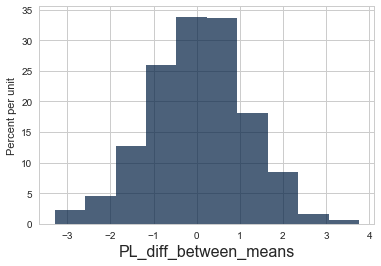

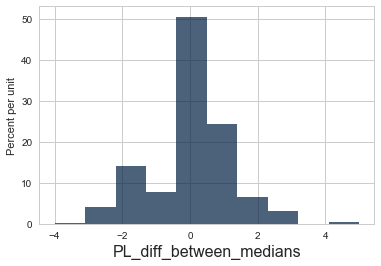

In [12]:
# Calculate significance level and draw histograms

mean_count = abs_diff_tab.where("PL_abs_diff_between_means", \
                            are.above_or_equal_to(abs(diff_between_means))).num_rows
mean_difference_significance_level = (mean_count + 1) / (num_perm + 1)
#
median_count = abs_diff_tab.where("PL_abs_diff_between_medians", \
                            are.above_or_equal_to(abs(diff_between_medians))).num_rows
median_difference_significance_level = (mean_count + 1) / (num_perm + 1)

print("Significance level of difference between means = " + str(mean_difference_significance_level))
print("Significance level of difference between medians = " + str(median_difference_significance_level))

diff_tab.hist("PL_diff_between_means")
diff_tab.hist("PL_diff_between_medians")

In [13]:
...

Ellipsis

** Question 6 (10 points):** What do you think: Is the observed difference of 9 ounces just a statistical fluke, or is it "real"?

Looks like it's real

In [17]:
...

Ellipsis

### Is there an association between birth weight and gestational days ?

There are many ways to measure association between numerical variables. We will use a particularly simple one, the "quadrant correlation". Let bw_median be the median birth weight and gd_median be the median number of gestational days.

Divide the babies into 4 subsets:

* n_upper_upper is the number of babies with BW >= bw_median and GD >= gd_median

* n_lower_lower is the number of babies with BW < bw_median and GD < gd_median

* n_upper_lower is the number of babies with BW >= bw_median and GD < gd_median

* n_lower_upper is the number of babies with BW < bw_median and GD >= gd_median

Then the quadrant correlaton between birth weight and gestational days is defined as

qc = ((n_upper_upper + n_lower_lower) - (n_upper_lower + n_lower_upper)) / baby_num_rows

<br>

It is easy to see that 

* The quadrant correlation between two numerical features - call them feature_1 and feature_2  -
is between -1 and 1. 

* The quadrant correlation is positive if large values of feature_1 go with large values of feature_2 and small values of feature_1 go with small values of feature_2. 

* The quadrant correlation is negative if large values of feature_1 go with small values of feature_2 and small values of feature_1 go with large values of feature_2. 


** Question 7 (5 points):** Draw a scatter plot of BW (on the vertical axis) versus GD (on the horizontal axis).
    
** Note:** Besides the feature labels, the "scatter" method takes additional arguments that control the width and height of the plot and the size of the dots. Try width = 10, height = 5, s = 10.

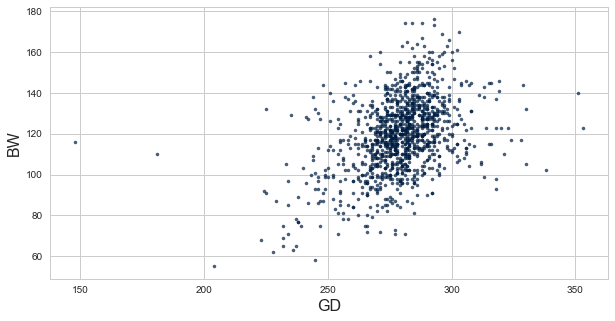

In [14]:
baby.scatter("GD", "BW", width = 10, height = 5, s = 10)

In [15]:
...

Ellipsis

** Question 8 (10 points):** Does it look like there is a positive association, or a negative association, or no association?

It looks like there is a positive association.

In [16]:
...

Ellipsis

** Question 9 (20 points):** Write a function

quadrant_correlation(table, feature_1, feature2)

such that  

quadrant_correlation(baby, "BW", "GD") computers the quadrant correlation between BW and GD

Calculate and print the quadrant correlation between GD and BW

In [20]:
def quadrant_correlation(table, var1, var2):
    median1 = np.median(table.column(var1))
    median2 = np.median(table.column(var2))
    n_right_upper = table.where(var1, are.above_or_equal_to(median1)) \
                         .where(var2, are.above_or_equal_to(median2)).num_rows
    n_right_lower = table.where(var1, are.above_or_equal_to(median1)) \
                         .where(var2, are.below(median2)).num_rows
    n_left_upper = table.where(var1, are.below(median1)) \
                         .where(var2, are.above_or_equal_to(median2)).num_rows
    n_left_lower = table.where(var1, are.below(median1)) \
                         .where(var2, are.below(median2)).num_rows
    quadrant_correlation = ((n_right_upper + n_left_lower) - 
                           (n_right_lower + n_left_upper)) / table.num_rows
    return(quadrant_correlation)

quadrant_correlation(baby, "GD", "BW")

0.29131175468483816

In [21]:
...

Ellipsis

Now the same question arises as above: Is a quadrant correlation of about 0.3 indicative of an association between BW and GD, or is it just a statistical fluke?

**Question 10 (20 points):** Write code to perform a permutation test of the null hypotheses "no association". 

In [24]:
table = baby
feature_1 = "GD"
feature_2 = "BW"
num_perm = 1000

qc_original = quadrant_correlation(table, feature_1, feature_2)

qc_permuted = np.zeros(num_perm)
permuted_table = table

for i in np.arange(num_perm):
    permuted_feature_2 = table.select(feature_2).sample(table.num_rows, with_replacement = False)\
                        .column(feature_2)
    permuted_table = permuted_table.with_column(feature_2, permuted_feature_2)
    qc_permuted[i] = quadrant_correlation(permuted_table, feature_1, feature_2)



In [ ]:
...

** Question 11 (10 points):** Draw a histogram of the permutation distribution based on a sample of N = 1,000 permutations.

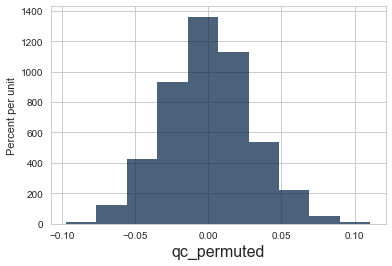

In [25]:
Table().with_column("qc_permuted", qc_permuted).hist("qc_permuted")

In [ ]:
...

** Question 12 (10 points) :** Calculate and print the significance evel of the test.

In [26]:
# Calculate significance level

abs_qc_permuted = Table().with_columns("abs_qc_permuted", np.abs(qc_permuted))
count = abs_qc_permuted.where("abs_qc_permuted", are.above_or_equal_to(abs(qc_original))).num_rows
significance_level = (count + 1) / (num_perm + 1)

print("significance level" + str(significance_level))

significance level0.000999000999000999


** Question 13 (10 points):** What do you think: Is the observed quadrant correlation of about 0.3 just a statistical fluke, or is there really an association between BW and GD?

Looks like there really is an association.

In [27]:
...

Ellipsis